In [6]:
#https://codewords.recurse.com/issues/six/image-processing-101

import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

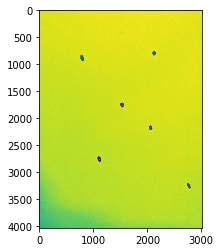

In [8]:
# get binary image and apply Gaussian blur
seeds = cv2.imread('../images/dots.jpg')
seeds_gray = cv2.cvtColor(seeds, cv2.COLOR_BGR2RGB)
seeds_gray = cv2.cvtColor(seeds_gray, cv2.COLOR_RGB2GRAY)
seeds_preprocessed = cv2.GaussianBlur(seeds_gray, (5, 5), 0)
plt.imshow(seeds_preprocessed)

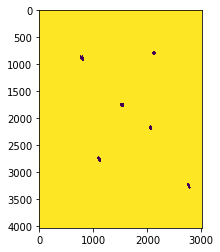

In [9]:
# get binary image
_, seeds_binary = cv2.threshold(seeds_preprocessed, 120, 255, cv2.THRESH_BINARY)
plt.imshow(seeds_binary)


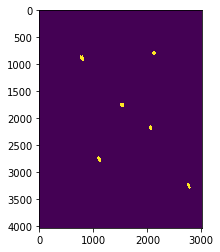

In [10]:
# invert image to get seeds
seeds_binary = cv2.bitwise_not(seeds_binary)
plt.imshow(seeds_binary)

4871.5
number of seeds: 6


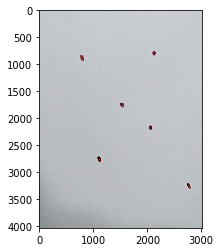

In [18]:
# find contours
#seeds_contours, _ = cv2.findContours(seeds_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
_, seeds_contours, _= cv2.findContours(seeds_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# make copy of image
seeds_and_contours = np.copy(seeds)

# find contours of large enough area
min_seed_area = 60
# large_contours = [cnt for cnt in seeds_contours if cv2.contourArea(cnt) > min_seed_area]
areaContours = np.array([cv2.contourArea(cnt) for cnt in seeds_contours])
print(np.average(areaContours))

# draw contours
contours = cv2.drawContours(seeds_and_contours, large_contours, -1, (255,0,0))

plt.imshow(contours)
# print number of contours
print('number of seeds: %d' % len(large_contours))